## Cardiovascular Disease dataset

## Behandling av data inför analys

In [1]:
import kagglehub
import pandas as pd

# Ladda ner senaste versionen av datasetet
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")



# Läs in datasetet
df = pd.read_csv(f'{path}/cardio_train.csv', sep=';')

# Visa de första raderna för att kontrollera att det lästs in korrekt
df.head()


c:\Programering\It högskolan\Maskininlärning\Machine-Leraning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# Identifiera och ta bort felaktiga blodtryck
df = df[(df["ap_hi"] > 0) & (df["ap_lo"] > 0)]  # Ta bort negativa blodtryck
df = df[(df["ap_hi"] < 300) & (df["ap_lo"] < 300)]  # Ta bort omöjligt höga blodtryck

# Kontrollera antalet kvarvarande poster
print(f"Antal kvarvarande poster efter rensning: {len(df)}")

Antal kvarvarande poster efter rensning: 68985


# Exploratory Data Analysis (EDA) av Hjärt-kärlsjukdom Dataset

I detta avsnitt kommer jag att utforska och analysera datasetet för hjärt-kärlsjukdom från Kaggle. Jag kommer att besvara flera frågor om patienternas hälsotillstånd och riskfaktorer, samt visualisera resultaten med hjälp av diagram. 

## Datasetbeskrivning
Datasetet består av 70 000 patientposter med 11 egenskaper plus en målvariabel (`cardio`). Egenskaperna inkluderar ålder, kön, blodtryck, kolesterol, rökning, fysisk aktivitet med merar. Jag har noterat att datasetet innehåller vissa felaktigheter, t.ex. negativa blodtryck och omöjligt höga blodtryck vilket har rensats bort.

## Analys och Visualisering
Vi kommer att använda `pandas`, `matplotlib` och `seaborn` bland annat för att utföra analysen och skapa visualiseringar av resultaten. 

Följande frågor kommer att besvaras:

1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?
3. Hur ser åldersfördelningen ut?
4. Hur stor andel röker?
5. Hur ser viktfördelningen ut?
6. Hur ser längdfördelningen ut?
7. Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

Låt oss börja med att läsa in datasetet och utföra en första analys.

## 1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

Som en inledande fråga kommer jag att räkna antalet patienter som är positiva (`cardio = 1`) och negativa (`cardio = 0`) för hjärt-kärlsjukdom. Detta ger oss en översikt över fördelningen av sjukdomen i datasetet.

I detta fallet har jag inte tagit några andra parametrar i beaktan än just om man anses vara positiv eller negativ för hjärt-kärlsjukdomar. Utan den skall enbart ses som en första överblick för hur sjukdomen är fördelas i datasetet.

In [3]:
# 1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
positiva = df[df["cardio"] == 1].shape[0]
negativa = df[df["cardio"] == 0].shape[0]

print(f"Antal positiva för hjärt-kärlsjukdom: {positiva}")
print(f"Antal negativa för hjärt-kärlsjukdom: {negativa}")

Antal positiva för hjärt-kärlsjukdom: 34141
Antal negativa för hjärt-kärlsjukdom: 34844


## 2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?

För att sedan undersöka andra variabler kommer jag att kategorisera kolesterolvärdena i tre grupper: normala, över normala och långt över normala utifrån datasetets nivåer. Jag kommer sedan att beräkna andelen för varje kategori och visualisera resultatet med ett cirkeldiagram.

Även här har det inte beaktats några andra perametrar än de nivå-kategorier som angavs i datasetet.



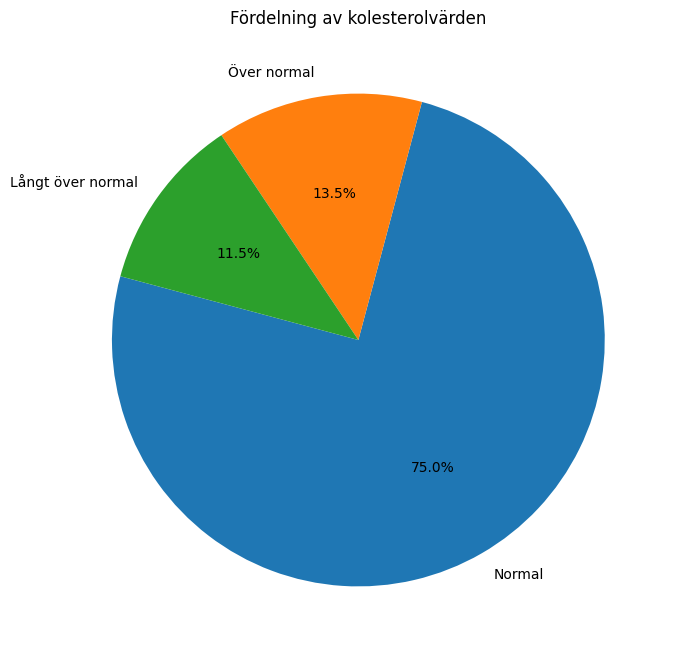

In [4]:
# 2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?

import matplotlib.pyplot as plt

# Kategorisera kolesterolvärden
def kategorisera_kolesterol(kolesterol):
    if kolesterol == 1:
        return "Normal"
    elif kolesterol == 2:
        return "Över normal"
    elif kolesterol == 3:
        return "Långt över normal"
    else:
        return "Okänd"

# Applicera kategorisering på datasetet
df["kolesterol_kategori"] = df["cholesterol"].apply(kategorisera_kolesterol)

# Beräkna andelen för varje kategori
andelar = df["kolesterol_kategori"].value_counts(normalize=True) * 100

# Rita cirkeldiagram
plt.figure(figsize=(8, 8))
plt.pie(andelar, labels=andelar.index, autopct="%1.1f%%", startangle=165)
plt.title("Fördelning av kolesterolvärden")
plt.show()

## 3. Hur ser åldersfördelningen ut?

Vidare kommer jag att analysera åldersfördelningen i datasetet. Eftersom åldern i datasetet är angiven i dagar, kommer jag att konvertera den till år för att göra analysen mer lättförståelig.

Histogrammet visar hur patienternas ålder är fördelad i datasetet. Detta kan ge oss insikter om vilka åldersgrupper som är mer representerade och hur åldern kan relatera till risken för hjärt-kärlsjukdom.


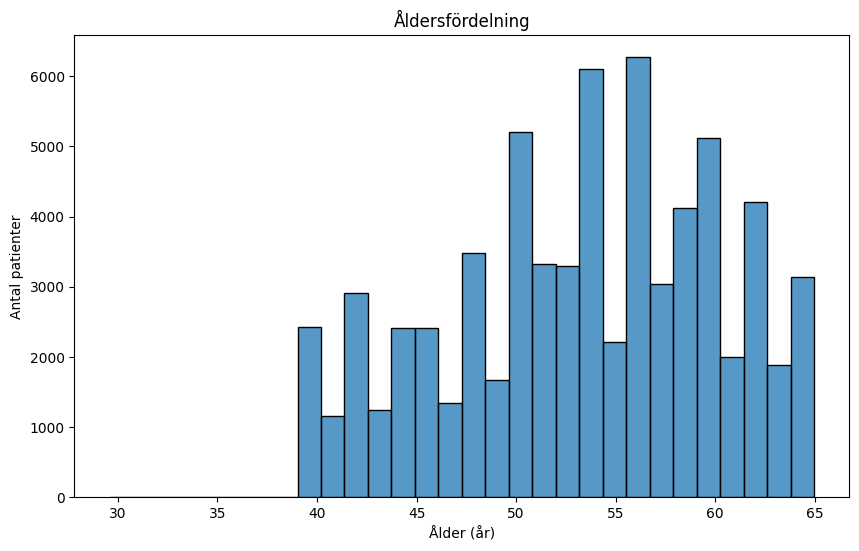

In [5]:
# 3. Hur ser åldersfördelningen ut? 

import seaborn as sns

# Rita histogram för åldersfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["age"] / 365, bins=30)  # Konvertera ålder från dagar till år
plt.title("Åldersfördelning")
plt.xlabel("Ålder (år)")
plt.ylabel("Antal patienter")
plt.show()

## 4. Hur stor andel röker?

I datasetet finns det data för andelen rökare, jag kommer därför att beräkna andelen patienter som röker i datasetet. Rökningsstatus är angiven i kolumnen `smoke`, där `1` indikerar rökare och `0` indikerar icke-rökare. Jag kommer att beräkna medelvärdet av denna kolumn för att få andelen rökare för att få en insikt i hur stor andel det rör sig om.

Denna analys ger oss en förståelse för hur stor andel av patienterna i datasetet som röker. Rökning är en viktig riskfaktor för hjärt-kärlsjukdom, och denna information kan vara användbar för vidare analyser.

In [6]:
# 4. Hur stor andel röker? 

# Beräkna andelen som röker
andel_roker = df["smoke"].mean() * 100 # Beräknar medelvärdet av kolumnen smoke, där 1 indikerar rökare och 0 icke-rökare.

print(f"Andel som röker: {andel_roker:.2f}%")

Andel som röker: 8.79%


## 5. Hur ser viktfördelningen ut?

Vidare kommer jag att analysera viktfördelningen i datasetet. Vikt är en viktig faktor som kan påverka risken för hjärt-kärlsjukdom, och genom att visualisera fördelningen kan vi få insikter om hur patienternas vikt är fördelad. Jag kommer att använda ett histogram för att visualisera fördelningen för att snabbt se hur viktfördelningen ser ut.


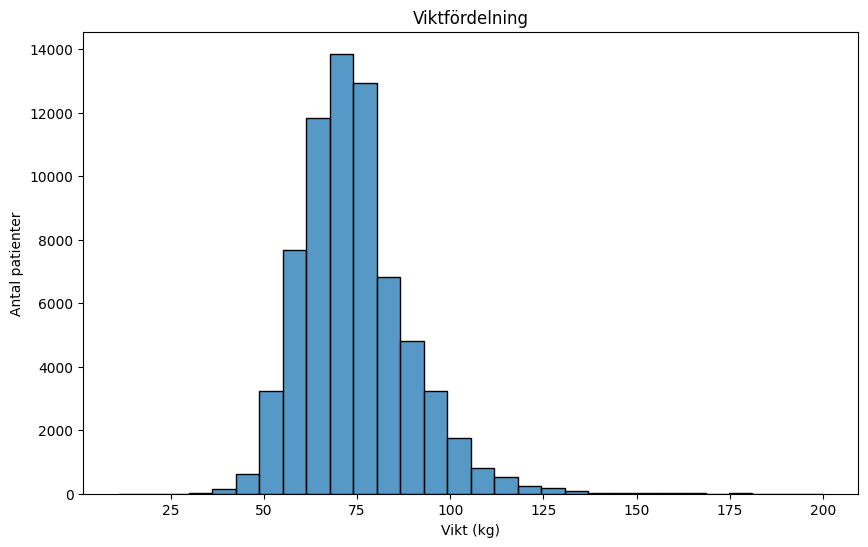

In [7]:
# 5. Hur ser viktfördelningen ut? 

# Rita histogram för viktfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["weight"], bins=30)
plt.title("Viktfördelning")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal patienter")
plt.show()

## 6. Hur ser längdfördelningen ut?

En annan viktig faktor är längden, därför kommer jag att analysera längdfördelningen i datasetet. Längd är en faktor som kan påverka risken för hjärt-kärlsjukdom, och genom att visualisera fördelningen kan vi få en överblick om hur patienternas längd är fördelad. Jag kommer att använda ett histogram för att visualisera fördelningen.

Histogrammet visar hur patienternas längd är fördelad i datasetet. Detta kan ge oss en fingervisning om vilka längdintervall som är vanligast och hur längden kan relatera till risken för hjärt-kärlsjukdom.


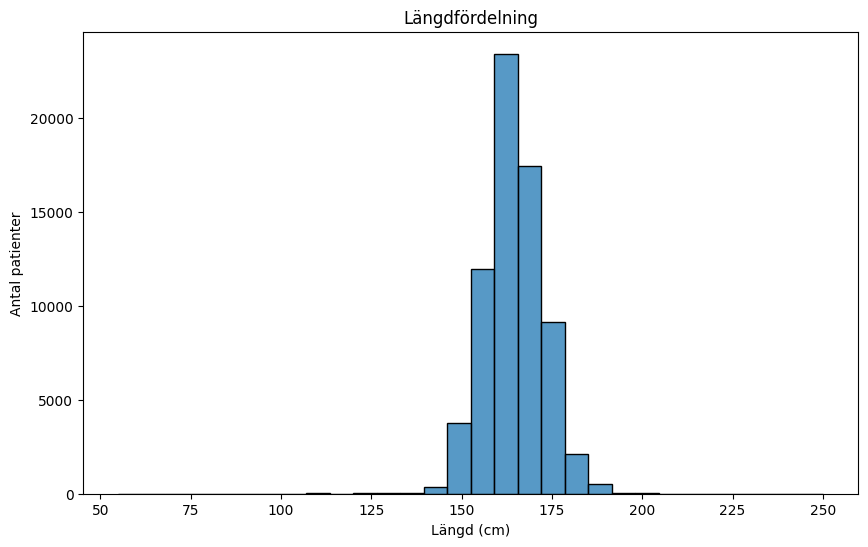

In [8]:
# 6. Hur ser längdfördelningen ut? 

# Rita histogram för längdfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["height"], bins=30)
plt.title("Längdfördelning")
plt.xlabel("Längd (cm)")
plt.ylabel("Antal patienter")
plt.show()

## 7. Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

Det kan samtidigt vara intressant hur fördelningen ser ut mellan kön, därmed kommer jag att analysera andelen kvinnor och män som har hjärt-kärlsjukdom i datasetet. 

Kön är en viktig faktor som kan påverka risken för hjärt-kärlsjukdom, och genom att visualisera fördelningen kan vi få insikter om hur sjukdomen är fördelad mellan könen. Jag kommer att använda ett stapeldiagram för att visualisera resultatet.

För att göra visualiseringen ännu tydligare har jag även lagt med en beräkning för den totala mängden kvinnor och män som fanns med i datasetet, samt hur stor andel av dessa som har hjärt-kärlssjukdom.








Antal kvinnor med hjärt-kärlsjukdom: 22113
Totalt antal kvinnor: 44932
Andel hjärt-kärlsjukdom för kvinnor: 49.21%
Antal män med hjärt-kärlsjukdom: 12028
Totalt antal män: 24053
Andel hjärt-kärlsjukdom för män: 50.01%


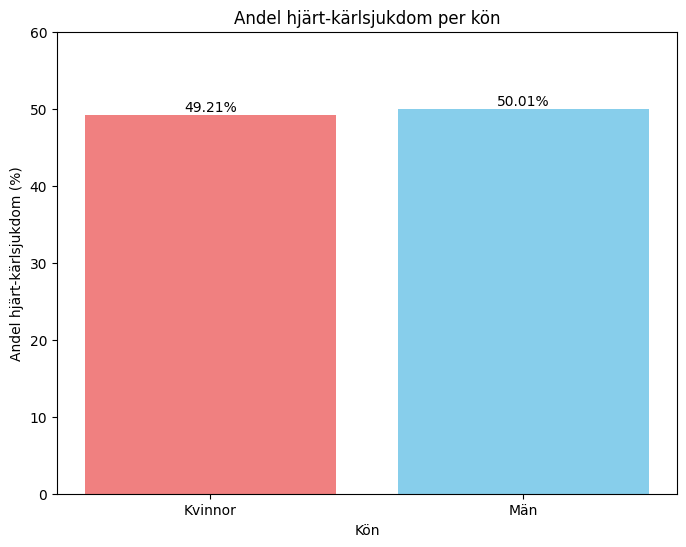

In [9]:
# 7. Hur stor andel av kvinnor respektive män har hjärt och kärlsjukdom? 

# Beräkna antalet kvinnor och män med hjärt-kärlsjukdom
antal_sjuka_kvinnor = df[(df["gender"] == 1) & (df["cardio"] == 1)].shape[0]
antal_sjuka_man = df[(df["gender"] == 2) & (df["cardio"] == 1)].shape[0]


# Beräkna totalt antal kvinnor och män
totalt_kvinnor = df[df["gender"] == 1].shape[0]
totalt_man = df[df["gender"] == 2].shape[0]

# Beräkna andelen hjärt-kärlsjukdom per kön
andel_sjuka_kvinnor = (antal_sjuka_kvinnor / totalt_kvinnor) * 100
andel_sjuka_man = (antal_sjuka_man / totalt_man) * 100


# Visa resultatet
print(f"Antal kvinnor med hjärt-kärlsjukdom: {antal_sjuka_kvinnor}")
print(f"Totalt antal kvinnor: {totalt_kvinnor}")
print(f"Andel hjärt-kärlsjukdom för kvinnor: {andel_sjuka_kvinnor:.2f}%")
print(f"Antal män med hjärt-kärlsjukdom: {antal_sjuka_man}")
print(f"Totalt antal män: {totalt_man}")
print(f"Andel hjärt-kärlsjukdom för män: {andel_sjuka_man:.2f}%")

# Skapa etiketter för kön
kon_etiketter = ["Kvinnor", "Män"]

# Rita stapeldiagram
plt.figure(figsize=(8, 6))
bars = plt.bar(kon_etiketter, [andel_sjuka_kvinnor, andel_sjuka_man], color=["lightcoral", "skyblue"])

# Lägg till procentuella värden ovanpå staplarna
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha="center", va="bottom")

plt.title("Andel hjärt-kärlsjukdom per kön")
plt.xlabel("Kön")
plt.ylabel("Andel hjärt-kärlsjukdom (%)")
plt.ylim(0, 60)  # Justera y-axeln för bättre överblick
plt.show()


## Feature engineering BMI

---

## BMI (Body Mass Index) Analys

För att analysera hur BMI (Body Mass Index) påverkar risken för hjärt-kärlsjukdom har jag skapat en feature för BMI och kategoriserat den enligt WHO:s definitioner.

##  Beräkna BMI
BMI beräknas med formeln:

![BMI Formel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4_IG4Ro84_kYjBj4IpzOV_v8aepc3p64EFCelIJoLzVFsIPNfvofx8YnfsAe5HCUkDQ&usqp=CAU)

###  Ta bort orimliga BMI-värden
Jag har tagit bort orimliga BMI-värden genom att använda gränserna 15 och 50. Detta för att säkerställa att jag endast har realistiska värden i min analys. Det skall sägas att det i vissa unika fall finns värden som är utanför dessa nivåer.

Jag har valt att hålla mig mellan mellan dessa nivåer då dessa får anses träffa den största delen av befolkningen.

### Kategorisera BMI
Kategoriserat BMI enligt följande:
- **Underweight**: BMI < 18,5  
- **Normal range**: 18,5 ≤ BMI < 25  
- **Overweight**: 25 ≤ BMI < 30  
- **Obese (class I)**: 30 ≤ BMI < 35  
- **Obese (class II)**: 35 ≤ BMI < 40  
- **Obese (class III)**: BMI ≥ 40




In [10]:

# Beräkna BMI
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

# Ta bort orimliga BMI-värden

# Vi använder gränserna 15 och 50 som ett första steg
df = df[(df["BMI"] >= 15) & (df["BMI"] <= 50)]

# Skapa kategorisk BMI-feature
def kategorisera_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal range"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 35:
        return "Obese (class I)"
    elif 35 <= bmi < 40:
        return "Obese (class II)"
    else:
        return "Obese (class III)"

df["BMI_kategori"] = df["BMI"].apply(kategorisera_bmi)

# Visa de första raderna för att kontrollera

print(df["BMI_kategori"].value_counts())

BMI_kategori
Normal range         25549
Overweight           24737
Obese (class I)      11991
Obese (class II)      4241
Obese (class III)     1587
Underweight            617
Name: count, dtype: int64


  
## Feature Engineering: Blodtryck

För att analysera hur blodtryck påverkar risken för hjärt-kärlsjukdom har jag skapat en ny feature för blodtryck och kategoriserat den enligt [Healthline](https://www.healthline.com/health/high-blood-pressure-hypertension).

### 1. Ta bort orimliga blodtryck och outliers
Vi har tagit bort orimliga blodtryck genom att använda gränserna 50/30 mmHg och 250/150 mmHg. Detta för att säkerställa att jag endast har realistiska värden i min analys. Ett blodtryck under 50 mmHg är extremt lågt, vilket ansesn vara en medicinsk nödsituation. Det är osannolikt att ett så lågt blodtryck är korrekt mätt i en rutinsituation. Lika gäller med ett blodtryck på > 250 som också anses vara extremt högt, därmed klassas de som en medicinsk nödsituation.

Med den bakgrunden drar jag slutsatsen att värden utanför dessa tyder på felaktig data eller mätfel.

### 2. Skapa kategorisk blodtrycksfeature
Vi har kategoriserat blodtryck enligt följande:
- **Normal**: < 120/80 mmHg  
- **Elevated**: 120-129/<80 mmHg  
- **Hypertension Stage 1**: 130-139/80-89 mmHg  
- **Hypertension Stage 2**: ≥140/≥90 mmHg  
- **Hypertensive Crisis**: >180/>120 mmHg  

### 3. Varför dessa gränser?
- **Kliniskt relevanta**: Gränserna är baserade på kliniskt accepterade värden för blodtryck, vilket gör att de är meningsfulla för analysen.
- **Standardiserade**: De följer WHO:s och andra hälsomyndigheters riktlinjer, vilket säkerställer att vår analys är i linje med etablerade medicinska standarder.
- **Informativt**: Genom att använda dessa gränser kan vi tydligt visa hur olika blodtrycksnivåer påverkar risken för hjärt-kärlsjukdom.


In [11]:

# Ta bort orimliga blodtryck
# Vi använder gränserna 50/30 mmHg och 250/150 mmHg som ett första steg
df = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 250)]
df = df[(df["ap_lo"] >= 30) & (df["ap_lo"] <= 150)]

# Skapa kategorisk blodtrycksfeature
def kategorisera_blodtryck(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return "Normal"
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return "Elevated"
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return "Hypertension Stage 1"
    elif ap_hi >= 140 or ap_lo >= 90:
        return "Hypertension Stage 2"
    elif ap_hi > 180 or ap_lo > 120:
        return "Hypertensive Crisis"
    else:
        return "Okänd"

df["blodtryck_kategori"] = df.apply(lambda row: kategorisera_blodtryck(row["ap_hi"], row["ap_lo"]), axis=1)

# Visa de första raderna för att kontrollera
print(df["blodtryck_kategori"].value_counts())

blodtryck_kategori
Hypertension Stage 1    39641
Hypertension Stage 2    16222
Normal                   9530
Elevated                 3107
Name: count, dtype: int64




## Resultat
Figuren kommer att visa fyra barplots:

1. **Blodtryckskategorier**: Andelen positiva fall per blodtryckskategori.
2. **BMI-kategorier**: Andelen positiva fall per BMI-kategori.
3. **Kolesterolnivåer**: Andelen positiva fall per kolesterolnivå.
4. **Aktivitetsnivå**: Andelen positiva fall per aktivitetsnivå.



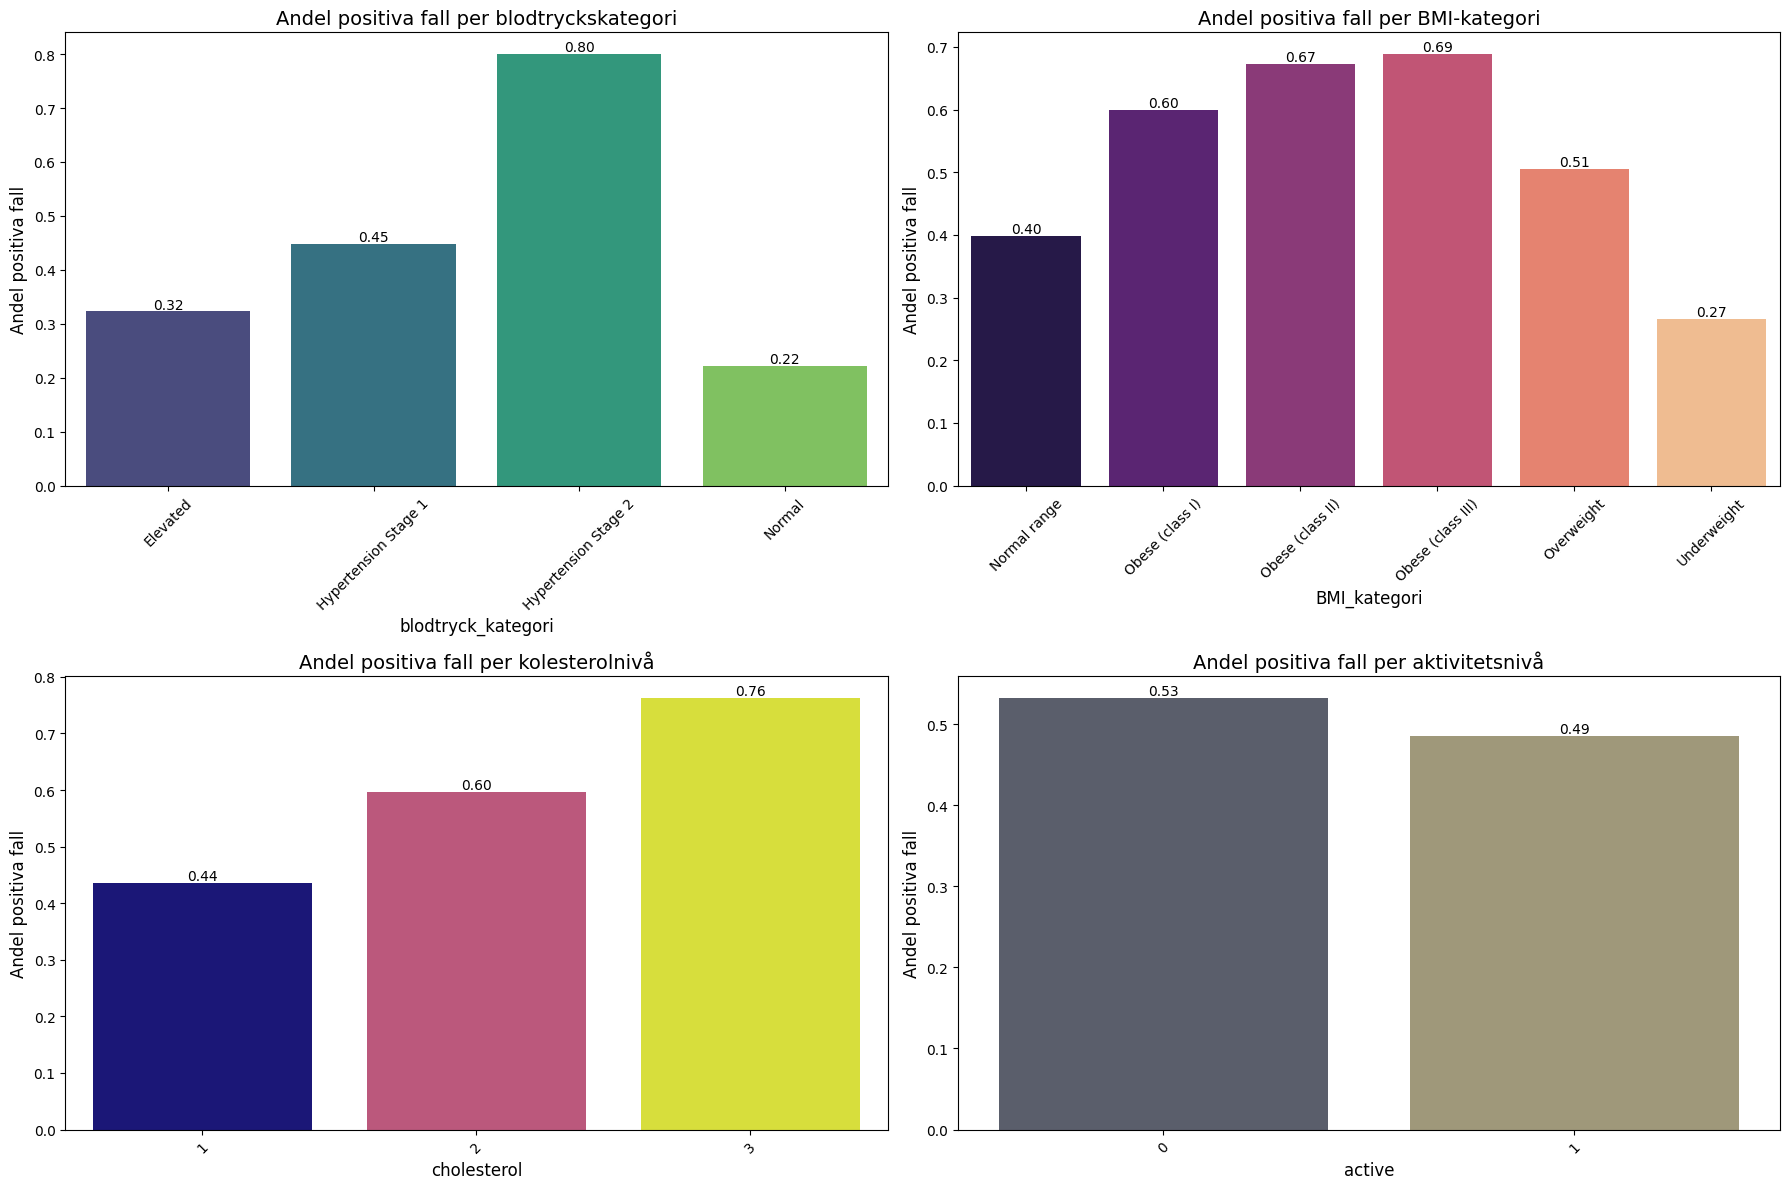

In [12]:
#Fått hjälp av Stackflow för att få ordning på syntaxen i funktionen.

# Funktion för att rita barplot
def rita_barplot(ax, data, x, y, title, palette):
    sns.barplot(x=x, y=y, data=data, ax=ax, hue=x, palette=palette, legend=False)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel("Andel positiva fall", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Skapa en figur med fler subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Beräkna andelen positiva fall för olika kategorier
blodtryck_andel = df.groupby("blodtryck_kategori")["cardio"].mean().reset_index()
bmi_andel = df.groupby("BMI_kategori")["cardio"].mean().reset_index()
kolesterol_andel = df.groupby("cholesterol")["cardio"].mean().reset_index()
aktivitet_andel = df.groupby("active")["cardio"].mean().reset_index()

# Rita barplots
rita_barplot(axes[0, 0], blodtryck_andel, "blodtryck_kategori", "cardio", "Andel positiva fall per blodtryckskategori", "viridis")
rita_barplot(axes[0, 1], bmi_andel, "BMI_kategori", "cardio", "Andel positiva fall per BMI-kategori", "magma")
rita_barplot(axes[1, 0], kolesterol_andel, "cholesterol", "cardio", "Andel positiva fall per kolesterolnivå", "plasma")
rita_barplot(axes[1, 1], aktivitet_andel, "active", "cardio", "Andel positiva fall per aktivitetsnivå", "cividis")

# Visa figuren
plt.tight_layout()
plt.show()

## Analys av korrelationer i datasetet

Baserat på korrelationsheatmapen kan vi identifiera flera intressanta samband mellan olika features.:

### 1. **Vikt och BMI (0.86)**
- **Stark positiv korrelation**: BMI beräknas direkt från vikt och längd, så det är naturligt att dessa har en stark positiv korrelation. En högre vikt leder till ett högre BMI.

### 2. **Systoliskt och diastoliskt blodtryck (ap_hi och ap_lo: 0.70)**
- **Stark positiv korrelation**: Systoliskt (ap_hi) och diastoliskt (ap_lo) blodtryck är två mått på samma fysiologiska process. De tenderar att öka eller minska tillsammans, även om de mäter olika aspekter av blodtrycket.

### 3. **Kön och längd (0.52)**
- **Måttlig positiv korrelation**: Det finns en biologisk skillnad i genomsnittlig längd mellan män och kvinnor, vilket förklarar korrelationen.

### 4. **Kolesterol och glukos (0.45)**
- **Måttlig positiv korrelation**: Höga kolesterolnivåer och höga blodsockernivåer är ofta relaterade till metabola problem och kan förekomma tillsammans, särskilt hos personer med ohälsosamma livsstilsvanor.

### 5. **Blodtryck och hjärt-kärlsjukdom (ap_hi och cardio: 0.43)**
- **Måttlig positiv korrelation**: Högt blodtryck är en känd riskfaktor för hjärt-kärlsjukdom. Denna korrelation bekräftar att personer med högre blodtryck har högre risk för hjärt-kärlsjukdom.

### 6. **Rökning och alkohol (0.34)**
- **Svag positiv korrelation**: Rökning och alkoholkonsumtion är beteenden som ofta förekommer tillsammans. Personer som röker tenderar också att konsumera mer alkohol.

### 7. **Ålder och hjärt-kärlsjukdom (0.24)**
- **Svag positiv korrelation**: Risken för hjärt-kärlsjukdom ökar med åldern, vilket förklarar denna korrelation.

### 8. **Längd och BMI (-0.19)**
- **Svag negativ korrelation**: För en given vikt kommer en längre person att ha ett lägre BMI, vilket förklarar den negativa korrelationen.

### Sammanfattning
Korrelationsheatmapen visar att det finns flera viktiga samband mellan olika features i datasetet. Särskilt starka korrelationer finns mellan vikt och BMI samt blodtryck. Dessa korrelationer kan hjälpa oss att förstå hur olika faktorer påverkar risken för hjärt-kärlsjukdom.

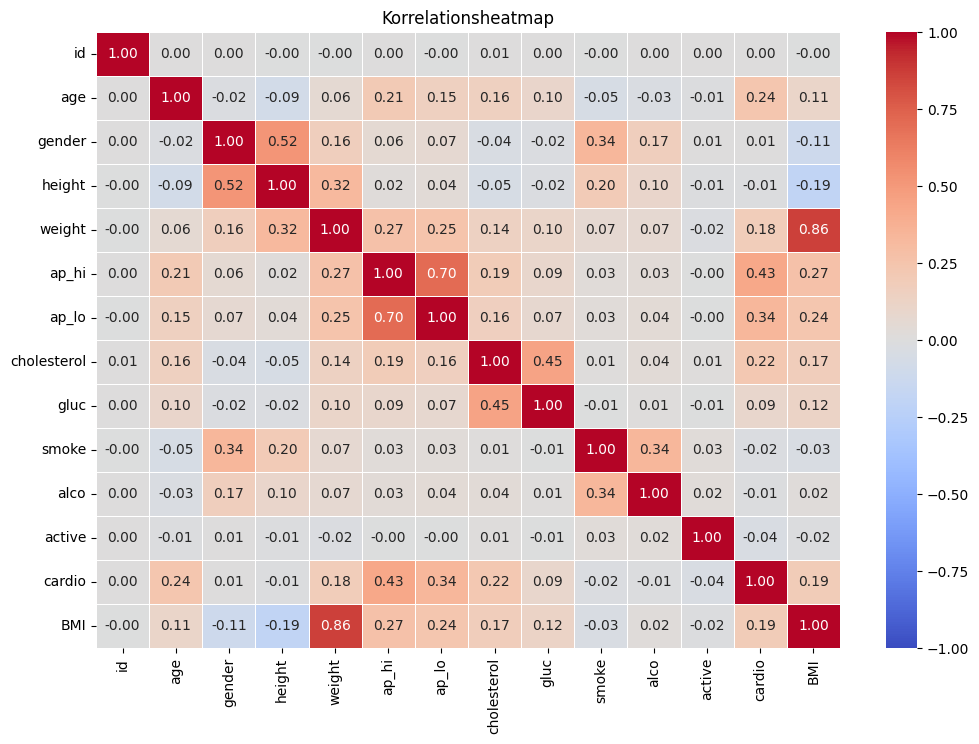

In [13]:
# Beräkna korrelationsmatrisen endast för numeriska kolumner
korrelationer = df.select_dtypes(include=['float64', 'int64']).corr()

# Skapa en heatmap av korrelationer
plt.figure(figsize=(12, 8))
sns.heatmap(korrelationer, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Korrelationsheatmap")
plt.show()

## Skapa två dataset


## One-Hot Encoding

One-hot encoding är en teknik som används för att omvandla kategoriska variabler till ett format som kan användas av maskininlärningsalgoritmer. Det innebär att varje unikt värde i en kategorisk kolumn omvandlas till en ny binär kolumn (1 eller 0), där 1 indikerar att den kategorin finns för den raden och 0 indikerar att den inte finns.

### Varför använda one-hot encoding?
- **Kategoriska variabler**: Variabler som innehåller text eller kategorier (t.ex. kön, BMI_kategori, blodtryckskategori) kan inte direkt användas i många maskininlärningsmodeller.
- **Binära kolumner**: Varje unikt värde i den kategoriska variabeln blir en ny kolumn. För varje rad sätts värdet till 1 för den kategori som gäller och 0 för alla andra kategorier.

### Exempel
Om vi har en kolumn `kön` med värdena `Man` och `Kvinna`, blir det två nya kolumner efter one-hot encoding:
- `kön_Man`: 1 om personen är man, annars 0.
- `kön_Kvinna`: 1 om personen är kvinna, annars 0.

### Hur gör man one-hot encoding i Python?
I Python kan man använda funktionen `pd.get_dummies()` från Pandas-biblioteket för att utföra one-hot encoding.


In [14]:
# Dataset 1
df1 = df.copy()
df1 = df1.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'BMI', "kolesterol_kategori"])
df1 = pd.get_dummies(df1, columns=['BMI_kategori', 'blodtryck_kategori', 'gender'], drop_first=True, dtype=int)

# Dataset 2
df2 = df.copy()
df2 = df2.drop(columns=['BMI_kategori', 'blodtryck_kategori', 'height', 'weight', "kolesterol_kategori"])
df2 = pd.get_dummies(df2, columns=['gender'], drop_first=True, dtype=int)

# Visa de första raderna för att kontrollera
print("Dataset 1:")
print(df1.head())

print("\nDataset 2:")
print(df2.head())

Dataset 1:
   id    age  cholesterol  gluc  smoke  alco  active  cardio  \
0   0  18393            1     1      0     0       1       0   
1   1  20228            3     1      0     0       1       1   
2   2  18857            3     1      0     0       0       1   
3   3  17623            1     1      0     0       1       1   
4   4  17474            1     1      0     0       0       0   

   BMI_kategori_Obese (class I)  BMI_kategori_Obese (class II)  \
0                             0                              0   
1                             1                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   BMI_kategori_Obese (class III)  BMI_kategori_Overweight  \
0                               0                        0   
1                               0                        0   
2                    

## Maskininlärning DF1

----------------

##  Train-Validation-Test Split
Jag delar upp datasetet i tränings-, validerings- och testdata. 

In [15]:
from sklearn.model_selection import train_test_split

# Dela upp datasetet i tränings-, validerings- och testdata
X = df1.drop(columns=['cardio'])  # Features
y = df1['cardio']  # Target

# Första split: Träningsdata (80%) och temporär data (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Andra split: Valideringsdata (50% av temporär) och testdata (50% av temporär)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Gör samma sak för Df2:

# Dela upp datasetet i tränings-, validerings- och testdata
X2 = df2.drop(columns=['cardio'])  # Features
y2 = df2['cardio']  # Target

# Första split: Träningsdata (80%) och temporär data (20%)
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.2, random_state=123)

# Andra split: Valideringsdata (50% av temporär) och testdata (50% av temporär)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=123) 


##  Skala datasetet
Jag skalar datasetet med både standardisering och normalisering (separat) för DF1.

In [16]:
# Standardisering

from sklearn.preprocessing import StandardScaler

# Skapa en StandardScaler
scaler_std = StandardScaler()

# Skala tränings-, validerings- och testdata
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)
X_test_std = scaler_std.transform(X_test)


# Normalisering

from sklearn.preprocessing import MinMaxScaler

# Skapa en MinMaxScaler
scaler_mix = MinMaxScaler()

# Skala tränings-, validerings- och testdata
X_train_scaled = scaler_mix.fit_transform(X_train_std)
X_val_scaled = scaler_mix.transform(X_val_std)
X_test_scaled = scaler_mix.transform(X_test_std)



## Skala datasetet 

Skalar sedan enbart för DF2

In [17]:

# Skala tränings-, validerings- och testdata
X2_train_std = scaler_std.fit_transform(X2_train)
X2_val_std = scaler_std.transform(X2_val)
X2_test_std = scaler_std.transform(X2_test)

# Skala tränings-, validerings- och testdata
X2_train_scaled = scaler_mix.fit_transform(X2_train_std)
X2_val_scaled = scaler_mix.transform(X2_val_std)
X2_test_scaled = scaler_mix.transform(X2_test_std)

## Definiera hyperparametrar (param grids)
För varje modell definierar vi en uppsättning hyperparametrar att testa.

In [18]:
"""
# Logistic regression

param_grid_linearregression = {
    'C': [0.1, 0.5, 1, 10, 100], # Ett mindre värde på C innebär starkare regularisering
    'penalty': ['l1', 'l2'] # Bestämmer om koefficienterna kan bli satta till 0 eller inte
}

# XGBoost (eXtreme Gradient Boosting)

param_grid_xgboost = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2], # Inlärningstakten, hur snabbt modellen anpassar sig under träning
    'max_depth': [3, 5, 7, 9], # Hur djupt varje träd är och hur komplext det får vara
    'n_estimators': [50, 100, 200] # Antalet träd som det får vara
}

# KNN - KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Antal grannar
    'weights': ['uniform', 'distance'],  # Vikter för grannar
    'p': [1, 2]  # Distansmått (1 = Manhattan, 2 = Euclidean)
}

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20],  # Maximalt djup för trädet
    'min_samples_split': [2, 5, 10, 20],  # Minsta antal sampel för att dela en nod
    'min_samples_leaf': [1, 2, 4, 8]  # Minsta antal sampel i ett löv
    
}
"""


"\n# Logistic regression\n\nparam_grid_linearregression = {\n    'C': [0.1, 0.5, 1, 10, 100], # Ett mindre värde på C innebär starkare regularisering\n    'penalty': ['l1', 'l2'] # Bestämmer om koefficienterna kan bli satta till 0 eller inte\n}\n\n# XGBoost (eXtreme Gradient Boosting)\n\nparam_grid_xgboost = {\n    'learning_rate': [0.001, 0.01, 0.1, 0.2], # Inlärningstakten, hur snabbt modellen anpassar sig under träning\n    'max_depth': [3, 5, 7, 9], # Hur djupt varje träd är och hur komplext det får vara\n    'n_estimators': [50, 100, 200] # Antalet träd som det får vara\n}\n\n# KNN - KNeighborsClassifier\n\nparam_grid_knn = {\n    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Antal grannar\n    'weights': ['uniform', 'distance'],  # Vikter för grannar\n    'p': [1, 2]  # Distansmått (1 = Manhattan, 2 = Euclidean)\n}\n\nparam_grid_dt = {\n    'max_depth': [3, 5, 7, 10, 15, 20],  # Maximalt djup för trädet\n    'min_samples_split': [2, 5, 10, 20],  # Minsta antal sampel för att dela en no

In [19]:
from model_training import train_models

#Anropa modellen

train_models(X_train_scaled, X2_train_scaled, y_train, y2_train, X_val_scaled, 
                y_val, y2_val, X2_test_scaled, X_test_scaled, X2_val_scaled, y_test, y2_test)

Bästa parametrar för XGBoost med data från DF1: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


ValueError: Feature shape mismatch, expected: 16, got 1

In [ ]:
file_path =r"C:\Programering\It högskolan\Maskininlärning\Machine-Leraning\Övningsuppgifter\Labb\evaluation_scores.csv"

evalv_score = pd.read_csv(file_path)


In [21]:

# Läs in CSV-filen
results_df = pd.read_csv("evaluation_scores.csv")

# Skapa en kolumn för datasetet baserat på modellnamnet
results_df['Dataset'] = results_df['Model'].apply(lambda x: 'df1' if 'från DF2' not in x else 'df2')
# Rensa modellnamnen
results_df['Model'] = results_df['Model'].str.replace(' från DF2', '')
# Sortera efter Dataset och Model
results_df = results_df.sort_values(by=['Dataset', 'Model'])


results_df.head(25)

,Model,Best Parameters,Validation Accuracy,Test Accuracy,Dataset
7,Decision Tree med normaliserad data,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.503358,0.506861,df1
6,Decision Tree med standardiserad data,"{'max_depth': 6, 'min_samples_leaf': 5, 'min_s...",0.704526,0.704380,df1
5,KNN med normaliserad data,"{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}",0.493723,0.503650,df1
4,KNN med standardiserad data,"{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}",0.691679,0.680876,df1
3,Logistic Regression med normaliserad data,"{'C': 0.1, 'penalty': 'l1'}",0.510511,0.502482,df1
2,Logistic Regression med standardiserad data,"{'C': 0.1, 'penalty': 'l1'}",0.710219,0.706569,df1
1,XGBoost med normaliserad data,"{'learning_rate': 0.001, 'max_depth': 9, 'n_es...",0.505401,0.510219,df1
0,XGBoost med standardiserad data,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.710949,0.706569,df1
15,Decision Tree med normaliserad data,"{'max_depth': 7, 'min_samples_leaf': 3, 'min_s...",0.722628,0.510949,df2
14,Decision Tree med standardiserad data,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.497080,0.500876,df2


In [ ]:
  # Läs in CSV-filen
file_path = r"C:\Programering\It högskolan\Maskininlärning\Machine-Leraning\Övningsuppgifter\Labb\evaluation_scores.csv"
evalv_score = pd.read_csv(file_path)
    # Skapa en ny kolumn för de bästa värdena från varje modell och DataFrame
   # Skapa en ny kolumn för de bästa värdena från varje modell och DataFrame
evalv_score['Bästa XGBoost (DF1)'] = evalv_score[evalv_score['Model'].str.contains('XGBoost') & ~evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa XGBoost (DF2)'] = evalv_score[evalv_score['Model'].str.contains('XGBoost') & evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa Logistic Regression (DF1)'] = evalv_score[evalv_score['Model'].str.contains('Logistic Regression') & ~evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa Logistic Regression (DF2)'] = evalv_score[evalv_score['Model'].str.contains('Logistic Regression') & evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa KNN (DF1)'] = evalv_score[evalv_score['Model'].str.contains('KNN') & ~evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa KNN (DF2)'] = evalv_score[evalv_score['Model'].str.contains('KNN') & evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa Decision Tree (DF1)'] = evalv_score[evalv_score['Model'].str.contains('Decision Tree') & ~evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()
evalv_score['Bästa Decision Tree (DF2)'] = evalv_score[evalv_score['Model'].str.contains('Decision Tree') & evalv_score['Model'].str.contains('DF2', na=False)]['Test Accuracy'].max()

# Sortera DataFrame efter modellnamn
evalv_score_sorted = evalv_score.sort_values(by='Model')

In [23]:
# Definiera en anpassad sorteringsordning
custom_order = ['XGBoost', 'Logistic Regression', 'KNN', 'Decision Tree']

# Skapa en sorteringsnyckel baserat på den anpassade ordningen
evalv_score['Model_order'] = evalv_score['Model'].apply(lambda x: next((i for i, model in enumerate(custom_order) if model in x), len(custom_order)))

# Sortera DataFrame efter den anpassade ordningen
evalv_score_sorted = evalv_score.sort_values(by='Model_order').drop(columns=['Model_order'])



# Visa den sorterade DataFrame:n
evalv_score_sorted.head(20)


,Model,Best Parameters,Validation Accuracy,Test Accuracy,Bästa XGBoost (DF1),Bästa XGBoost (DF2),Bästa Logistic Regression (DF1),Bästa Logistic Regression (DF2),Bästa KNN (DF1),Bästa KNN (DF2),Bästa Decision Tree (DF1),Bästa Decision Tree (DF2)
0,XGBoost med standardiserad data,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.710949,0.706569,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
1,XGBoost med normaliserad data,"{'learning_rate': 0.001, 'max_depth': 9, 'n_es...",0.505401,0.510219,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
9,XGBoost med normaliserad data från DF2,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.729781,0.588467,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
8,XGBoost med standardiserad data från DF2,"{'learning_rate': 0.001, 'max_depth': 7, 'n_es...",0.502774,0.501898,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
11,Logistic Regression med normaliserad data från...,"{'C': 1, 'penalty': 'l1'}",0.724818,0.497080,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
10,Logistic Regression med standardiserad data fr...,"{'C': 0.1, 'penalty': 'l1'}",0.491825,0.500292,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
2,Logistic Regression med standardiserad data,"{'C': 0.1, 'penalty': 'l1'}",0.710219,0.706569,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
3,Logistic Regression med normaliserad data,"{'C': 0.1, 'penalty': 'l1'}",0.510511,0.502482,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
12,KNN med standardiserad data från DF2,"{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}",0.503358,0.490511,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949
13,KNN med normaliserad data från DF2,"{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}",0.717226,0.579270,0.706569,0.588467,0.706569,0.500292,0.680876,0.57927,0.70438,0.510949


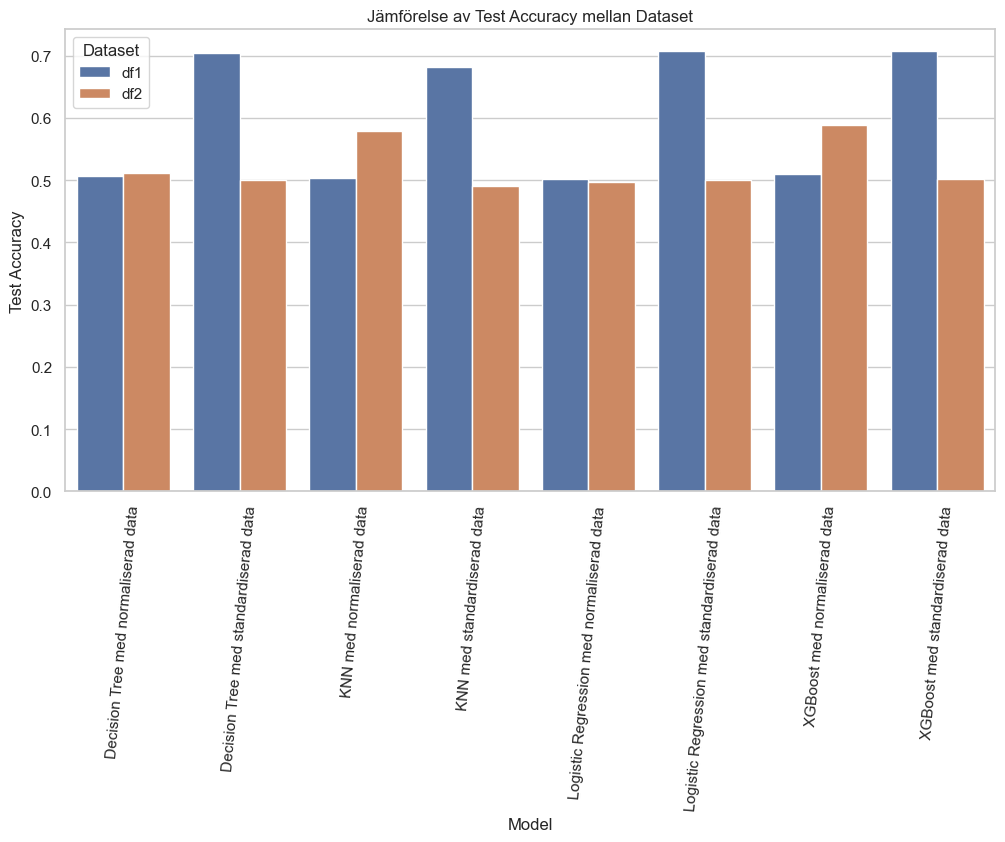

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ställ in temat för Seaborn
sns.set(style="whitegrid")

# Skapa ett stapeldiagram för testnoggrannhet per modell och dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', hue='Dataset', data=results_df)
plt.title('Jämförelse av Test Accuracy mellan Dataset')
plt.xticks(rotation=85)
plt.show()

In [25]:
import pandas as pd

# Läs in den första CSV-filen
file1 = r"C:\Programering\It högskolan\Maskininlärning\Machine-Leraning\Övningsuppgifter\Labb\evaluation_scores.csv"
df1 = pd.read_csv(file1)

# Läs in den andra CSV-filen
file2 = r"C:\Programering\It högskolan\Maskininlärning\Machine-Leraning\evaluation_scores_compare.csv"
df2 = pd.read_csv(file2)

# Slå ihop dataframarna på kolumnen 'Model'
merged_df = pd.merge(df1, df2, on='Model', suffixes=('_run1', '_run2'))

# Beräkna skillnaden i validerings- och testnoggrannhet
merged_df['Validation_Accuracy_Diff'] = merged_df['Validation Accuracy_run1'] - merged_df['Validation Accuracy_run2']
merged_df['Test_Accuracy_Diff'] = merged_df['Test Accuracy_run1'] - merged_df['Test Accuracy_run2']

# Visa resultaten
print(merged_df[['Model', 'Validation_Accuracy_Diff', 'Test_Accuracy_Diff']])




                                                Model  \
0                     XGBoost med standardiserad data   
1                       XGBoost med normaliserad data   
2         Logistic Regression med standardiserad data   
3           Logistic Regression med normaliserad data   
4                         KNN med standardiserad data   
5                           KNN med normaliserad data   
6               Decision Tree med standardiserad data   
7                 Decision Tree med normaliserad data   
8            XGBoost med standardiserad data från DF2   
9              XGBoost med normaliserad data från DF2   
10  Logistic Regression med standardiserad data fr...   
11  Logistic Regression med normaliserad data från...   
12               KNN med standardiserad data från DF2   
13                 KNN med normaliserad data från DF2   
14     Decision Tree med standardiserad data från DF2   
15       Decision Tree med normaliserad data från DF2   

    Validation_Accuracy_Diff  

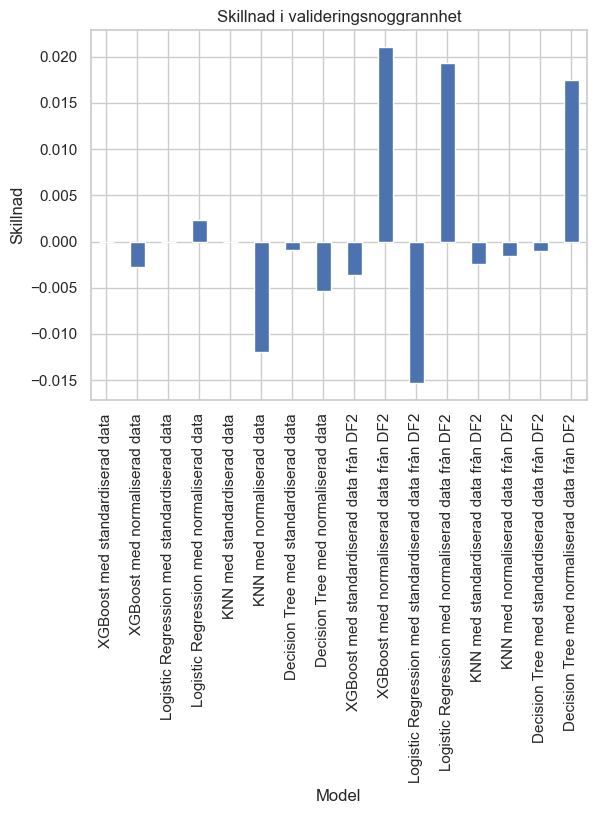

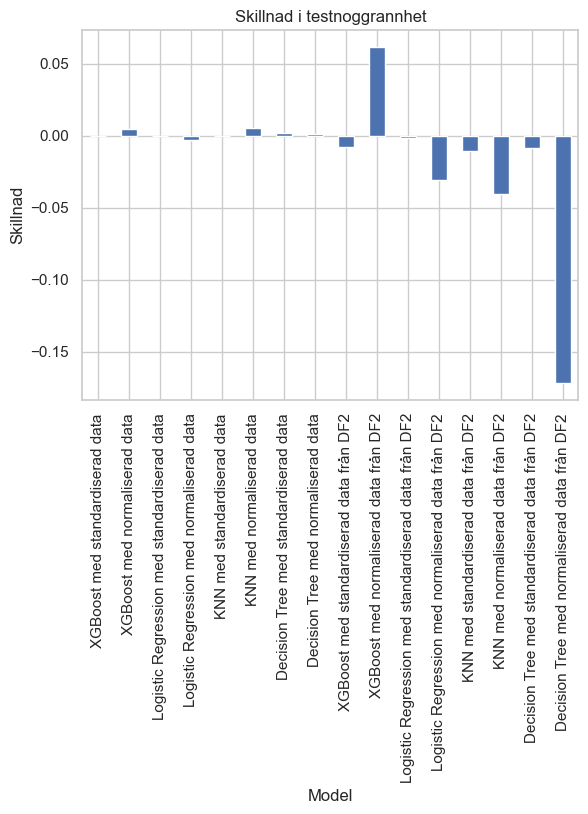

In [26]:
import matplotlib.pyplot as plt

# Skapa ett stapeldiagram för skillnader i valideringsnoggrannhet
merged_df.plot(kind='bar', x='Model', y='Validation_Accuracy_Diff', legend=False)
plt.title('Skillnad i valideringsnoggrannhet')
plt.ylabel('Skillnad')
plt.show()

# Skapa ett stapeldiagram för skillnader i testnoggrannhet
merged_df.plot(kind='bar', x='Model', y='Test_Accuracy_Diff', legend=False)
plt.title('Skillnad i testnoggrannhet')
plt.ylabel('Skillnad')
plt.show()